# Explore U19 data Pipeline

Here we introduce some useful DataJoint tools to explore the U19 pipeline

First thing first, import datajoint

In [2]:
import datajoint as dj

# 1. Browse schemas you have access to - `dj.list_schemas()`

In [4]:
dj.list_schemas()

Connecting shans@datajoint00.pni.princeton.edu:3306


['abondy_tutorial',
 'ahoag_admin_demo',
 'ahoag_admin_flask_demo',
 'ahoag_celery_test',
 'ahoag_lab_test',
 'ahoag_lightsheet_demo',
 'ahoag_microscope_demo',
 'ahoag_microscope_demo_old',
 'ahoag_spockadmin_demo',
 'ahoag_spockadmin_test',
 'ahoag_test_join',
 'ahoag_tutorial',
 'brody_2pdemo',
 'brody_trash',
 'brody_tutorial2',
 'brody_tutorial3',
 'brody_tutorial5',
 'ckopec_tutorial_db',
 'diamanti_tutorial',
 'dikshag_pipeline',
 'dikshag_tutorial',
 'gtm_testdb',
 'jjulian_tutorail',
 'jjulian_tutorial',
 'jounhong_session1',
 'jounhong_tutorial',
 'jyanar_tutorial3',
 'lpinto_tutorial',
 'ms81_tutorial',
 'mysql',
 'performance_schema',
 'shans_acquisition',
 'shans_action',
 'shans_behavior',
 'shans_imaging',
 'shans_lab',
 'shans_reference',
 'shans_subject',
 'shans_task',
 'shans_tutorial',
 'shans_tutorial2',
 'tdkim_tutorial',
 'test',
 'u19_acquisition',
 'u19_action',
 'u19_behavior',
 'u19_lab',
 'u19_meso',
 'u19_reference',
 'u19_subject',
 'u19_task',
 'u19lights


## Major schemas:   

Meta data: `u19_lab`, `u19_subject`, `u19_action`, `u19_task`  
Behavior: `u19_acquisition`, `u19_behavior` (also contains some imaging info)

These schemas have been generated by matlab or python, but as a user, you don't have to get the code to generate these tables. To work with these tables, the simplest thing you would do is to reconstruct a module that represents this schema with the method `create_virtual_module`.

In [16]:
lab = dj.create_virtual_module('lab', 'u19_lab') # the first argument here is the __name__ of the virtual module
task = dj.create_virtual_module('task', 'u19_task') 
subject = dj.create_virtual_module('subject', 'u19_subject')
action = dj.create_virtual_module('action', 'u19_action')
acquisition = dj.create_virtual_module('acquisition', 'u19_acquisition')
behavior = dj.create_virtual_module('behavior', 'u19_behavior')

In [18]:
subject.Subject()

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
hnieh_E36,E36,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


Now this is as if you have the code that generated the schema and tables, and have just imported them!

# 2. Browse tables in a schema - `dj.Diagram`

**Table tiers**:  
Manual table: green box  
Lookup table: gray box  
Imported table: blue oval  
Computed table: red circle  
Part table: plain text

**Dependencies**:  
One-to-one primary: thick solid line  
One-to-many primary: thin solid line  
Secondary foreign key reference: dashed line
renamed secondary foreign key references: orange dot

## Show tables in the whole schema

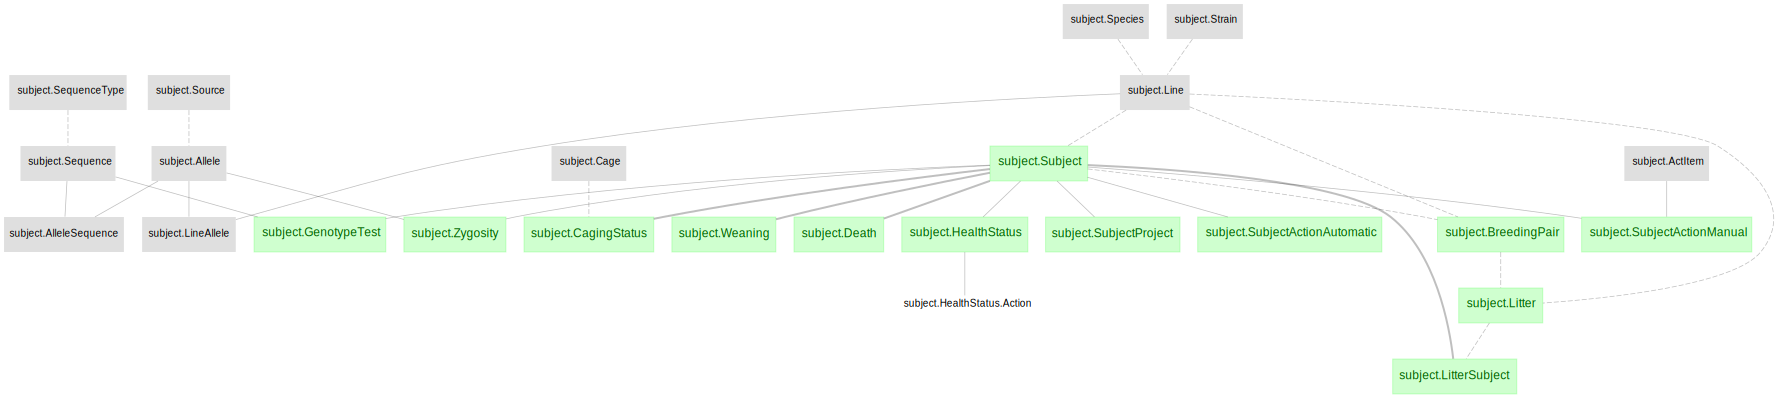

In [19]:
dj.Diagram(subject)

## Show diagram of arbitruary parts of the database

A combination of arbitruary tables:

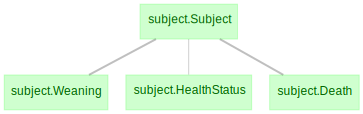

In [21]:
dj.Diagram(subject.Subject) + dj.Diagram(subject.Death) + dj.Diagram(subject.HealthStatus) + dj.Diagram(subject.Weaning)

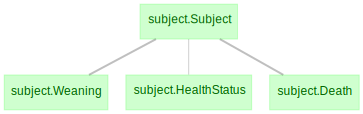

In [20]:
# same as above
dj.Diagram(subject.Subject) + subject.Death + subject.HealthStatus + subject.Weaning

The tables could be from different schemas:

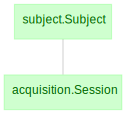

In [22]:
dj.Diagram(subject.Subject) + acquisition.Session

# 3. Getting the detailed definition of a table - `table.describe()`

In [23]:
subject.Subject.describe();

subject_fullname     : varchar(64)                  # username_mouse_nickname
---
subject_nickname     : varchar(16)                  
-> lab.User
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
-> lab.Location
-> [nullable] lab.Protocol
-> [nullable] subject.Line
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        



# 4. Browsing of data - queries

Query all subjects

In [24]:
subject.Subject()

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
hnieh_E36,E36,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


## Restriction  `&`: filtering data

### Restriction: Query one subject

In [25]:
# restrict by string
subject.Subject & 'subject_nickname="B205"'

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0


In [26]:
# restrict by dictionary
subject.Subject & {'subject_nickname': 'B205'}

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0


In [27]:
subject.Subject & {'sex': 'Male'}

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
hnieh_E36,E36,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


`OR` logic: a list of dictionaries

In [28]:
subject.Subject & [{'user_id': 'hnieh'}, {'user_id': 'emanuele'}]

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
hnieh_E36,E36,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


In [31]:
subject.Subject & "user_id in ('hnieh', 'emanuele')"

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
hnieh_E36,E36,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


### Restriction: Query subjects born after a date

In [32]:
subject.Subject & 'dob > "2019-01-01"'

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
lpinto_SP1,SP1,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,20.9
lpinto_SP10,SP10,lpinto,None,Female,2019-09-02,=BLOB=,vivarium,1910,SNAP-GLAMP6S,,22.8
lpinto_SP11,SP11,lpinto,None,Female,2019-09-02,=BLOB=,vivarium,1910,SNAP25-GLAMP6S,,24.0
lpinto_SP12,SP12,lpinto,None,Female,2019-08-17,=BLOB=,vivarium,1910,SNAP25-GLAMP6S,,23.2
lpinto_SP13,SP13,lpinto,None,Female,2019-08-17,=BLOB=,vivarium,1910,SNAP25-GLAMP6S,,22.4
lpinto_SP14,SP14,lpinto,None,Female,2019-08-17,=BLOB=,vivarium,1910,SNAP25-GLAMP6S,,23.7
lpinto_SP2,SP2,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,22.4
lpinto_SP3,SP3,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,21.6
lpinto_SP4,SP4,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,24.7
lpinto_SP5,SP5,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,20.3


### Restriction: subjects within a range of dates

In [33]:
subject.Subject & 'dob between "2019-01-01" and "2019-04-01"'

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
lpinto_SP1,SP1,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,20.9
lpinto_SP2,SP2,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,22.4
lpinto_SP3,SP3,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,21.6
lpinto_SP4,SP4,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,24.7
lpinto_SP5,SP5,lpinto,None,Female,2019-03-27,=BLOB=,vivarium,1910,Unknown,,20.3
lpinto_SP6,SP6,lpinto,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,28.1
lpinto_SP7,SP7,lpinto,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,23.6
lpinto_SP8,SP8,lpinto,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,27.4
mioffe_M10_604,M10_604,mioffe,None,Female,2019-02-10,=BLOB=,vivarium,1910,Thy1-GP5.3,,24.1
mioffe_M5_696,M5_696,mioffe,None,Female,2019-01-21,=BLOB=,vivarium,1910,Unknown,,15.0


### Restriction: Query subjects on multiple attributes

In [34]:
subject.Subject & 'dob > "2019-01-01"' & 'sex="Male"'

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
lpinto_SP6,SP6,lpinto,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,28.1
lpinto_SP7,SP7,lpinto,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,23.6
lpinto_SP8,SP8,lpinto,None,Male,2019-03-27,=BLOB=,vivarium,1910,Unknown,,27.4
lpinto_VG52,VG52,lpinto,None,Male,2019-04-21,=BLOB=,vivarium,1910,VGAT-ChR2-EYFP,,28.5
lpinto_VG53,VG53,lpinto,None,Male,2019-04-21,=BLOB=,vivarium,1910,VGAT-ChR2-EYFP,,25.7
mioffe_M7_669,M7_669,mioffe,None,Male,2019-01-05,=BLOB=,vivarium,1910,Ai93-Emx1 (Cre+eGFP-TTA+),,24.9
testuser_T02,T02,testuser,None,Male,2019-01-25,=BLOB=,valhalla,1910,C57BL6/J,,22.0
testuser_T03,T03,testuser,None,Male,2019-02-01,=BLOB=,valhalla,1910,C57BL6/J,,18.0
testuser_T05,T05,testuser,None,Male,2019-01-23,=BLOB=,vivarium,1910,C57BL6/J,,19.0
testuser_T06,T06,testuser,None,Male,2019-01-13,=BLOB=,vivarium,1910,D1-CRE,,25.0


### Restriction: Query subjects restricted by other tables

In [35]:
# subjects that are dead
subject.Subject & subject.Death

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
mioffe_M4_984,M4_984,mioffe,None,Female,2018-10-27,=BLOB=,vivarium,1910,C57BL6/J,,25.5
mioffe_M5_696,M5_696,mioffe,None,Female,2019-01-21,=BLOB=,vivarium,1910,Unknown,,15.0
testuser_T02,T02,testuser,None,Male,2019-01-25,=BLOB=,valhalla,1910,C57BL6/J,,22.0
testuser_T03,T03,testuser,None,Male,2019-02-01,=BLOB=,valhalla,1910,C57BL6/J,,18.0
testuser_T14,T14,testuser,None,Male,2019-01-23,=BLOB=,valhalla,1910,Unknown,,26.0
testuser_T15,T15,testuser,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
testuser_T17,T17,testuser,None,Male,2017-05-05,=BLOB=,valhalla,1910,D1-CRE,,23.0
testuser_T18,T18,testuser,None,Male,2019-01-23,=BLOB=,valhalla,1910,Unknown,,25.0
testuser_T19,T19,testuser,None,Male,2017-04-04,=BLOB=,valhalla,1910,Unknown,,25.0
testuser_T20,T20,testuser,None,Male,2019-01-23,=BLOB=,valhalla,1910,Unknown,,28.0


In [36]:
# subjects that are alive
subject.Subject - subject.Death

subject_fullname username_mouse_nickname,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
emanuele_B205,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
hnieh_E36,E36,hnieh,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


## Join `*`:  gather information from different tables

In [37]:
subject.Subject * action.WaterAdministration

subject_fullname username_mouse_nickname,administration_date date time,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight,earned water administered,supplement,received,watertype_name
emanuele_B205,2018-06-20,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-21,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-23,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-24,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-25,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-27,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-28,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,1.0,0.0,1.0,Unknown
emanuele_B205,2018-06-29,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-30,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown
emanuele_B205,2018-07-01,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,0.0,1.0,1.0,Unknown


In [38]:
action.WaterAdministration()

subject_fullname username_mouse_nickname,administration_date date time,earned water administered,supplement,received,watertype_name
emanuele_B205,2018-06-20,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-21,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-23,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-24,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-25,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-27,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-28,1.0,0.0,1.0,Unknown
emanuele_B205,2018-06-29,0.0,1.0,1.0,Unknown
emanuele_B205,2018-06-30,0.0,1.0,1.0,Unknown
emanuele_B205,2018-07-01,0.0,1.0,1.0,Unknown


In [39]:
lab.Lab()

lab name of lab,institution,address,time_zone,pi_name
tanklab,Princeton,"Princeton Neuroscience Institute, Princeton University Princeton, NJ 08544",America/New_York,D. W. Tank
wanglab,Princeton,"Neuroscience Institute, Princeton University Princeton, NJ 08544",America/New_York,S. Wang
wittenlab,Princeton,"Princeton Neuroscience Institute, Princeton University Princeton, NJ 08544",America/New_York,I. Witten


In [42]:
lab.Project()

project,project_description
accumulation of evidence,
behavioral task,


Behavior of join:  
1. match the common field(s) of the primary keys in the two tables
2. do a combination of the non-matched part of the primary key
3. listing out the secondary attributes for each combination
4. if two tables have secondary attributes that share a same name, it will throw an error. To join, we need to rename that attribute for at least one of the tables.

For example,

In [44]:
subject.Subject * acquisition.Session

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,subject_nickname,user_id username,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight,session_start_time start time,session_end_time end time,session_location,task,level difficulty level,set_id parameter set id,stimulus_bank path to the function to generate the stimulus,stimulus_commit git hash for the version of the function,session_performance percentage correct on this session,session_narrative,session_protocol function and parameters to generate the stimulus,"session_code_version code version of the stimulus, maybe a version number, or a githash"
emanuele_B205,2018-06-27,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-06-27 10:48:00,2018-06-27 11:54:00,VRTrain5,Towers,4,1,,,96.3,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-06-28,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-06-28 11:40:00,2018-06-28 12:40:00,VRTrain5,Towers,5,1,,,94.9,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-03,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-03 11:30:00,2018-07-03 12:33:00,VRTrain5,Towers,6,1,,,95.0,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-04,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-04 11:14:00,2018-07-04 12:13:00,VRTrain5,Towers,7,1,,,92.6,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-05,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-05 11:27:00,2018-07-05 12:20:00,VRTrain5,Towers,8,1,,,94.8,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-06,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-06 11:18:00,2018-07-06 12:15:00,VRTrain5,Towers,9,1,,,69.3,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-07,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-07 11:47:00,2018-07-07 12:32:00,VRTrain5,Towers,10,1,,,61.7,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-11,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-11 11:32:00,2018-07-11 12:27:00,VRTrain5,Towers,10,1,,,77.0,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-12,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-12 10:56:00,2018-07-12 11:50:00,VRTrain5,Towers,9,1,,,66.7,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=
emanuele_B205,2018-07-13,0,B205,emanuele,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0,2018-07-13 10:57:00,2018-07-13 11:49:00,VRTrain5,Towers,9,1,,,64.2,,poisson_blocks_PuffAndTower.m poisson_blocks_reboot_3m.mat PoissonBlocksCondensed3m_Ben,=BLOB=


## Projection `.proj()`: focus on attributes of interest

In [46]:
(subject.Subject * acquisition.Session).proj()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number
emanuele_B205,2018-06-27,0
emanuele_B205,2018-06-28,0
emanuele_B205,2018-07-03,0
emanuele_B205,2018-07-04,0
emanuele_B205,2018-07-05,0
emanuele_B205,2018-07-06,0
emanuele_B205,2018-07-07,0
emanuele_B205,2018-07-11,0
emanuele_B205,2018-07-12,0
emanuele_B205,2018-07-13,0


In [47]:
subject.Subject.proj('dob', 'sex')

subject_fullname username_mouse_nickname,sex sex,dob birth date
emanuele_B205,Male,None
emanuele_B208,Male,None
emanuele_B3151,Male,None
emanuele_B4486,Male,None
emanuele_B4487,Male,None
emanuele_B4488,Male,None
emanuele_B4489,Male,None
hnieh_E18,Male,None
hnieh_E26,Male,None
hnieh_E36,Male,None


### rename attribute with ***proj()***

In [50]:
subject.Subject.proj(gender='sex', birth_date='dob')

subject_fullname username_mouse_nickname,gender sex,birth_date birth date
emanuele_B205,Male,None
emanuele_B208,Male,None
emanuele_B3151,Male,None
emanuele_B4486,Male,None
emanuele_B4487,Male,None
emanuele_B4488,Male,None
emanuele_B4489,Male,None
hnieh_E18,Male,None
hnieh_E26,Male,None
hnieh_E36,Male,None


### perform simple computations with ***proj***

**Example 1: Get date of a weighing activity:**

In [51]:
weighing_with_date = action.Weighing.proj(weighing_date='date(weighing_time)') # more options, check MySQL syntax

In [52]:
weighing_with_date

subject_fullname username_mouse_nickname,weighing_time,weighing_date calculated attribute
emanuele_B205,2018-07-09 12:09:00,2018-07-09
emanuele_B205,2018-07-15 12:29:00,2018-07-15
emanuele_B205,2018-07-16 11:48:00,2018-07-16
emanuele_B205,2018-07-22 12:07:00,2018-07-22
emanuele_B205,2018-07-23 11:58:00,2018-07-23
emanuele_B205,2018-07-29 11:28:00,2018-07-29
emanuele_B205,2018-07-30 11:06:00,2018-07-30
emanuele_B205,2018-08-05 11:27:00,2018-08-05
emanuele_B205,2018-08-06 11:32:00,2018-08-06
emanuele_B205,2018-08-12 11:24:00,2018-08-12


**Example 2: Age of the animal when performing each session?**

In [55]:
# First get the date of birth and the session date into the same query
q = subject.Subject * acquisition.Session
q = q.proj('dob')
q

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,dob birth date
emanuele_B205,2018-06-27,0,None
emanuele_B205,2018-06-28,0,None
emanuele_B205,2018-07-03,0,None
emanuele_B205,2018-07-04,0,None
emanuele_B205,2018-07-05,0,None
emanuele_B205,2018-07-06,0,None
emanuele_B205,2018-07-07,0,None
emanuele_B205,2018-07-11,0,None
emanuele_B205,2018-07-12,0,None
emanuele_B205,2018-07-13,0,None


In [56]:
# Then compute the age
q_with_age = q.proj('dob', age='datediff(session_date, dob)') & 'dob is not NULL'
q_with_age

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,dob birth date,age calculated attribute
hnieh_E58,2017-10-17,0,2016-11-14,337
hnieh_E58,2017-10-18,0,2016-11-14,338
hnieh_E58,2017-10-19,0,2016-11-14,339
hnieh_E58,2017-10-20,0,2016-11-14,340
hnieh_E58,2017-10-23,0,2016-11-14,343
hnieh_E58,2017-10-24,0,2016-11-14,344
hnieh_E58,2017-10-25,0,2016-11-14,345
hnieh_E58,2017-10-26,0,2016-11-14,346
hnieh_E58,2017-10-27,0,2016-11-14,347
hnieh_E58,2017-10-31,0,2016-11-14,351


## Aggregation `.aggr()`: simple computation of one table against another table

Example: how many sessions does each subject do so far?

In [59]:
subject.Subject.aggr(acquisition.Session, n='count(*)', lastest_session='min(session_date)')

subject_fullname username_mouse_nickname,n calculated attribute,lastest_session calculated attribute
emanuele_B205,41,2018-06-27
emanuele_B208,40,2018-06-27
emanuele_B3151,40,2018-06-27
emanuele_B4486,39,2018-06-27
emanuele_B4487,40,2018-06-27
emanuele_B4488,39,2018-06-27
emanuele_B4489,41,2018-06-26
hnieh_E18,7,2017-08-03
hnieh_E26,43,2017-08-03
hnieh_E36,26,2017-08-03


# 5. Fetching data

## Fetch all fields: `fetch()`

In [60]:
# fetch all data from a table
subjs = subject.Subject.fetch()
subjs

array([('emanuele_B205', 'B205', 'emanuele', None, 'Male', None, array([[[253, 253, 253],
        [246, 251, 252],
        [193, 241, 251],
        ...,
        [ 64, 215, 246],
        [105, 224, 248],
        [251, 251, 251]],

       [[255, 255, 255],
        [239, 252, 254],
        [ 60, 217, 249],
        ...,
        [ 34, 212, 248],
        [ 58, 217, 249],
        [254, 253, 253]],

       [[254, 255, 255],
        [172, 239, 252],
        [ 55, 216, 249],
        ...,
        [ 64, 218, 249],
        [ 37, 212, 248],
        [142, 231, 249]],

       ...,

       [[175, 239, 252],
        [  0, 202, 247],
        [ 40, 213, 248],
        ...,
        [ 13, 207, 247],
        [ 78, 221, 250],
        [255, 254, 253]],

       [[197, 244, 253],
        [  0, 202, 247],
        [ 78, 220, 249],
        ...,
        [  3, 205, 247],
        [ 86, 222, 250],
        [255, 254, 253]],

       [[232, 250, 254],
        [ 30, 210, 248],
        [149, 234, 252],
        ...,
        [

In [61]:
subjs['subject_fullname']

array(['emanuele_B205', 'emanuele_B208', 'emanuele_B3151',
       'emanuele_B4486', 'emanuele_B4487', 'emanuele_B4488',
       'emanuele_B4489', 'hnieh_E18', 'hnieh_E26', 'hnieh_E36',
       'hnieh_E38', 'hnieh_E39', 'hnieh_E42', 'hnieh_E43', 'hnieh_E44',
       'hnieh_E45', 'hnieh_E47', 'hnieh_E48', 'hnieh_E49', 'hnieh_E50',
       'hnieh_E51', 'hnieh_E52', 'hnieh_E53', 'hnieh_E54', 'hnieh_E55',
       'hnieh_E56', 'hnieh_E57', 'hnieh_E58', 'hnieh_E59', 'hnieh_E61',
       'hnieh_E62', 'hnieh_E63', 'hnieh_E64', 'hnieh_E65', 'hnieh_E66',
       'hnieh_E67', 'hnieh_E68', 'hnieh_E69', 'hnieh_E70', 'hnieh_E71',
       'hnieh_E74', 'hnieh_E75', 'hnieh_E76', 'hnieh_E77', 'hnieh_E78',
       'hnieh_E79', 'hnieh_E80', 'hnieh_E82', 'hnieh_E83', 'hnieh_E84',
       'hnieh_E85', 'hnieh_E86', 'hnieh_E87', 'hnieh_E88', 'hnieh_J131',
       'hnieh_J132', 'hnieh_J133', 'koay_E30', 'koay_E34', 'koay_E35',
       'koay_K52', 'koay_K55', 'koay_K58', 'koay_K59', 'koay_K60',
       'koay_K61', 'koay_K62'

In [62]:
subjs['dob']

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, datetime.date(2016, 11, 14), None,
       datetime.date(2017, 7, 27), datetime.date(2017, 7, 27),
       datetime.date(2017, 4, 2), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 27), datetime.date(2017, 6, 15),
       datetime.date(2017, 11, 20), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 18), datetime.date(2017, 11, 20),
       datetime.date(2017, 11, 20), datetime.date(2017, 12, 13),
       datetime.date(2017, 12, 13), datetime.date(2018, 3, 25),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 8),
       datetime.date(2017, 5, 3), None, datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 24), datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 8), None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, No

In [63]:
# fetch as a list of dictionaries
subjs_dict = subject.Subject.fetch(as_dict=True)
subjs_dict

[{'subject_fullname': 'emanuele_B205',
  'subject_nickname': 'B205',
  'user_id': 'emanuele',
  'genomics_id': None,
  'sex': 'Male',
  'dob': None,
  'head_plate_mark': array([[[253, 253, 253],
          [246, 251, 252],
          [193, 241, 251],
          ...,
          [ 64, 215, 246],
          [105, 224, 248],
          [251, 251, 251]],
  
         [[255, 255, 255],
          [239, 252, 254],
          [ 60, 217, 249],
          ...,
          [ 34, 212, 248],
          [ 58, 217, 249],
          [254, 253, 253]],
  
         [[254, 255, 255],
          [172, 239, 252],
          [ 55, 216, 249],
          ...,
          [ 64, 218, 249],
          [ 37, 212, 248],
          [142, 231, 249]],
  
         ...,
  
         [[175, 239, 252],
          [  0, 202, 247],
          [ 40, 213, 248],
          ...,
          [ 13, 207, 247],
          [ 78, 221, 250],
          [255, 254, 253]],
  
         [[197, 244, 253],
          [  0, 202, 247],
          [ 78, 220, 249],
          

In [64]:
# fetch as pandas dataframe
subjs_df = subject.Subject.fetch(format='frame')
subjs_df

,subject_nickname,user_id,genomics_id,sex,dob,head_plate_mark,location,protocol,line,subject_description,initial_weight
subject_fullname,,,,,,,,,,,
emanuele_B205,B205,emanuele,None,Male,None,"[[[253, 253, 253], [246, 251, 252], [193, 241,...",vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B208,B208,emanuele,None,Male,None,"[[[252, 252, 252], [245, 214, 208], [251, 246,...",vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B3151,B3151,emanuele,None,Male,None,"[[[253, 253, 253], [254, 253, 253], [255, 253,...",vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4486,B4486,emanuele,None,Male,None,"[[[252, 251, 251], [252, 248, 248], [247, 195,...",vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4487,B4487,emanuele,None,Male,None,"[[[210, 210, 210], [115, 115, 115], [215, 215,...",vivarium,1910,DAT-IRES-CRE,,27.0
emanuele_B4488,B4488,emanuele,None,Male,None,"[[[253, 253, 253], [215, 172, 247], [166, 70, ...",vivarium,1910,Unknown,,27.0
emanuele_B4489,B4489,emanuele,None,Male,None,"[[[253, 253, 253], [253, 253, 253], [243, 244,...",vivarium,1910,Unknown,,27.0
hnieh_E18,E18,hnieh,None,Male,None,None,valhalla,1910,Unknown,,26.0
hnieh_E26,E26,hnieh,None,Male,None,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",vivarium,1910,Unknown,,24.0


In [65]:
# fetch the primary key
pk = subject.Subject.fetch('KEY')
pk

[{'subject_fullname': 'emanuele_B205'},
 {'subject_fullname': 'emanuele_B208'},
 {'subject_fullname': 'emanuele_B3151'},
 {'subject_fullname': 'emanuele_B4486'},
 {'subject_fullname': 'emanuele_B4487'},
 {'subject_fullname': 'emanuele_B4488'},
 {'subject_fullname': 'emanuele_B4489'},
 {'subject_fullname': 'hnieh_E18'},
 {'subject_fullname': 'hnieh_E26'},
 {'subject_fullname': 'hnieh_E36'},
 {'subject_fullname': 'hnieh_E38'},
 {'subject_fullname': 'hnieh_E39'},
 {'subject_fullname': 'hnieh_E42'},
 {'subject_fullname': 'hnieh_E43'},
 {'subject_fullname': 'hnieh_E44'},
 {'subject_fullname': 'hnieh_E45'},
 {'subject_fullname': 'hnieh_E47'},
 {'subject_fullname': 'hnieh_E48'},
 {'subject_fullname': 'hnieh_E49'},
 {'subject_fullname': 'hnieh_E50'},
 {'subject_fullname': 'hnieh_E51'},
 {'subject_fullname': 'hnieh_E52'},
 {'subject_fullname': 'hnieh_E53'},
 {'subject_fullname': 'hnieh_E54'},
 {'subject_fullname': 'hnieh_E55'},
 {'subject_fullname': 'hnieh_E56'},
 {'subject_fullname': 'hnieh_E5

In [66]:
# fetch specific attributes
dob, sex = subject.Subject.fetch('dob', 'sex')

In [67]:
dob

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, datetime.date(2016, 11, 14), None,
       datetime.date(2017, 7, 27), datetime.date(2017, 7, 27),
       datetime.date(2017, 4, 2), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 27), datetime.date(2017, 6, 15),
       datetime.date(2017, 11, 20), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 18), datetime.date(2017, 11, 20),
       datetime.date(2017, 11, 20), datetime.date(2017, 12, 13),
       datetime.date(2017, 12, 13), datetime.date(2018, 3, 25),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 8),
       datetime.date(2017, 5, 3), None, datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 24), datetime.date(2018, 10, 24),
       datetime.date(2018, 10, 8), None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, No

In [68]:
# fetch specific attributes as a list of dictionary
info = subject.Subject.fetch('dob', 'sex', as_dict=True)
info

[{'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Female', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Male', 'dob': datetime.date(2016, 11, 14)},
 {'sex': 'Male', 'dob': None},
 {'sex': 'Female', 'dob': datetime.date(2017, 7, 27)},
 {'sex': 'Femal

## fetch data only from one entry: `fetch1`

In [73]:
B205 = (subject.Subject & {'subject_nickname': 'B205'}).fetch1()  # "fetch1()" because we know there's only one

In [74]:
B205

{'subject_fullname': 'emanuele_B205',
 'subject_nickname': 'B205',
 'user_id': 'emanuele',
 'genomics_id': None,
 'sex': 'Male',
 'dob': None,
 'head_plate_mark': array([[[253, 253, 253],
         [246, 251, 252],
         [193, 241, 251],
         ...,
         [ 64, 215, 246],
         [105, 224, 248],
         [251, 251, 251]],
 
        [[255, 255, 255],
         [239, 252, 254],
         [ 60, 217, 249],
         ...,
         [ 34, 212, 248],
         [ 58, 217, 249],
         [254, 253, 253]],
 
        [[254, 255, 255],
         [172, 239, 252],
         [ 55, 216, 249],
         ...,
         [ 64, 218, 249],
         [ 37, 212, 248],
         [142, 231, 249]],
 
        ...,
 
        [[175, 239, 252],
         [  0, 202, 247],
         [ 40, 213, 248],
         ...,
         [ 13, 207, 247],
         [ 78, 221, 250],
         [255, 254, 253]],
 
        [[197, 244, 253],
         [  0, 202, 247],
         [ 78, 220, 249],
         ...,
         [  3, 205, 247],
         [ 86

In [75]:
B205_key = (subject.Subject & {'subject_nickname': 'B205'}).fetch1('KEY')

In [76]:
B205_key

{'subject_fullname': 'emanuele_B205'}

In [81]:
B205_init_weight = (subject.Subject & {'subject_nickname': 'B205'}).fetch1('initial_weight')

In [82]:
B205_init_weight

27.0

In [5]:
meso = dj.create_virtual_module('meso', 'u19_meso')

In [ ]:
within_reference_image = meso.MotionCorrectionWithinFile.fetch('within_reference_image')

In [23]:
image = (meso.MotionCorrectionWithinFile() & 'session_number=0' & 'fov=1' & 'file_number=3').fetch1(
    'within_reference_image')

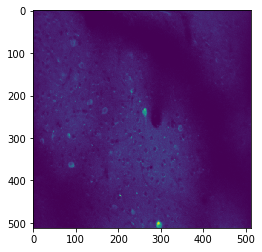

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [27]:
meso.MotionCorrectionAcrossFiles()

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,fov number of the field of view in this scan,mcorr_method,mc_parameter_set_id parameter set id,"cross_files_x_shifts nFrames x 2, meta file, fileMCorr-xShifts","cross_files_y_shifts nFrames x 2, meta file, fileMCorr-yShifts","cross_files_reference_image 512 x 512, meta file, fileMCorr-reference"
lpinto_SP6,2019-08-22,0,1,LinearNormalized,1,=BLOB=,=BLOB=,=BLOB=
lpinto_SP6,2019-08-22,0,2,LinearNormalized,1,=BLOB=,=BLOB=,=BLOB=
lpinto_SP6,2019-08-22,0,3,LinearNormalized,1,=BLOB=,=BLOB=,=BLOB=
